## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# modules we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error

In [2]:
training_data= pd.read_csv("/kaggle/input/titanic/train.csv")
testing_data=pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
print(training_data.shape)
print(testing_data.shape)

(891, 12)
(418, 11)


training data has more rows and (obviously a survived column)

First I will explore and visualize my data to gain better insights

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note to self: cabin, age and embarked have null values.
my data has numeric values as well as objects (Cabin, Embarked ,Ticket, Sex, Name)
objects should be converted to numeric and missing values should be handled

In [5]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64

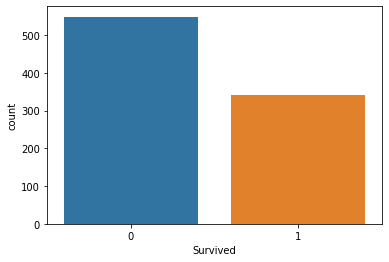

In [7]:
sns.countplot(x=training_data.Survived)
training_data['Survived'].value_counts()

Most passengers didn't survive

In [8]:
female = training_data.loc[training_data.Sex == 'female']["Survived"]
rate_female = sum(female)/len(female)
print("% of female who survived:", rate_female)

male = training_data.loc[training_data.Sex == 'male']["Survived"]
rate_male = sum(male)/len(male)
print("% of male who survived:", rate_male)

% of female who survived: 0.7420382165605095
% of male who survived: 0.18890814558058924


male      577
female    314
Name: Sex, dtype: int64

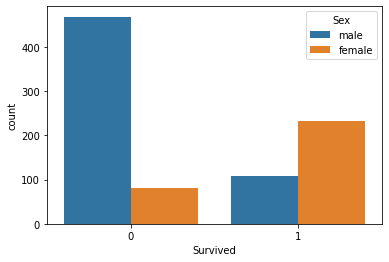

In [9]:
sns.countplot(x=training_data.Survived, hue=training_data.Sex)
training_data['Sex'].value_counts()

females have higher survival rate,even though Most passengers were males.

In [10]:
first_class = training_data.loc[training_data.Pclass == 1]["Survived"]
rate_first_class = sum(first_class)/len(first_class)
print("% of first_class who survived:", rate_first_class)

second_class = training_data.loc[training_data.Pclass == 2]["Survived"]
rate_second_class = sum(second_class)/len(second_class)
print("% of second_class who survived:", rate_second_class)

third_class = training_data.loc[training_data.Pclass == 3]["Survived"]
rate_third_class = sum(third_class)/len(third_class)
print("% of third_class who survived:", rate_third_class)

% of first_class who survived: 0.6296296296296297
% of second_class who survived: 0.47282608695652173
% of third_class who survived: 0.24236252545824846


3    491
1    216
2    184
Name: Pclass, dtype: int64

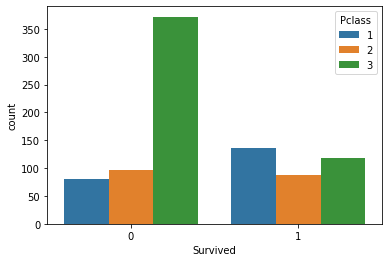

In [11]:
sns.countplot(x=training_data.Survived, hue=training_data.Pclass)
training_data['Pclass'].value_counts()

Even though most passengers were third class they had the lowest chance of survival, 1st class has highest survival rate.

In [12]:
Embarked_s = training_data.loc[training_data.Embarked == 'S']["Survived"]
rate_Embarked_s = sum(Embarked_s)/len(Embarked_s)
print("% of passengers who survived and embarked from s:", rate_Embarked_s)

Embarked_q = training_data.loc[training_data.Embarked == 'Q']["Survived"]
rate_Embarked_q = sum(Embarked_q)/len(Embarked_q)
print("% of passengers who survived and embarked from q:", rate_Embarked_q)

Embarked_c = training_data.loc[training_data.Embarked == 'C']["Survived"]
rate_Embarked_c = sum(Embarked_c)/len(Embarked_c)
print("% of passengers who survived and embarked from c:", rate_Embarked_c)

% of passengers who survived and embarked from s: 0.33695652173913043
% of passengers who survived and embarked from q: 0.38961038961038963
% of passengers who survived and embarked from c: 0.5535714285714286


S    644
C    168
Q     77
Name: Embarked, dtype: int64

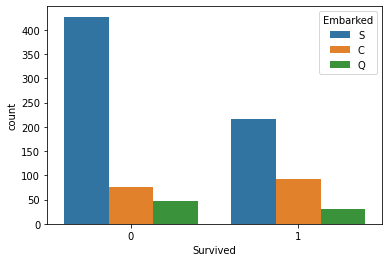

In [13]:
sns.countplot(x=training_data.Survived, hue=training_data.Embarked)
training_data['Embarked'].value_counts()

c has highest survival rate

In [14]:
Age_below = training_data.loc[training_data.Age<=training_data.Age.mean()]["Survived"]
rate_Age_below = sum(Age_below)/len(Age_below)
print("% of Age_below who survived:", rate_Age_below)

Age_above = training_data.loc[training_data.Age>training_data.Age.mean()]["Survived"]
rate_Age_above = sum(Age_above)/len(Age_above)
print("% of Age_above who survived:", rate_Age_above)

% of Age_below who survived: 0.40625
% of Age_above who survived: 0.40606060606060607


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

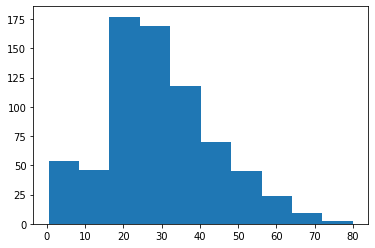

In [15]:
plt.hist(training_data['Age'])

Right skewed, 80 outlier?

In [16]:
#siblings range from 0 to 8, but discrete values are 0 1 2 3 4 5 8
#I will just divide it into a for loop + 1 sequential execution
sib = training_data.loc[training_data.SibSp == 8]["Survived"]
rate_sib = sum(sib)/len(sib)
print("% of passengers who had 8 siblings and survived:", rate_sib)
for i in range (0,5):
    sib = training_data.loc[training_data.SibSp == i]["Survived"]
    rate_sib = sum(sib)/len(sib)
    print("% of passengers who had ", i, " siblings and survived:", rate_sib)

% of passengers who had 8 siblings and survived: 0.0
% of passengers who had  0  siblings and survived: 0.34539473684210525
% of passengers who had  1  siblings and survived: 0.5358851674641149
% of passengers who had  2  siblings and survived: 0.4642857142857143
% of passengers who had  3  siblings and survived: 0.25
% of passengers who had  4  siblings and survived: 0.16666666666666666


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

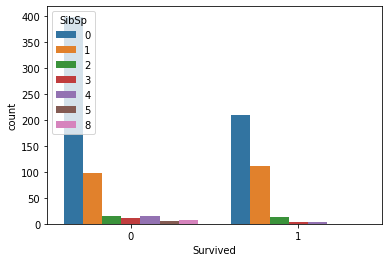

In [17]:
sns.countplot(x=training_data.Survived, hue=training_data.SibSp)
training_data['SibSp'].value_counts()

In [18]:
for i in range (0,7):
    parents = training_data.loc[training_data.Parch == i]["Survived"]
    rate_p = sum( parents)/len( parents)
    print("% of passengers who had ", i, " parents/children that survived:", rate_p)

% of passengers who had  0  parents/children that survived: 0.34365781710914456
% of passengers who had  1  parents/children that survived: 0.5508474576271186
% of passengers who had  2  parents/children that survived: 0.5
% of passengers who had  3  parents/children that survived: 0.6
% of passengers who had  4  parents/children that survived: 0.0
% of passengers who had  5  parents/children that survived: 0.2
% of passengers who had  6  parents/children that survived: 0.0


0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

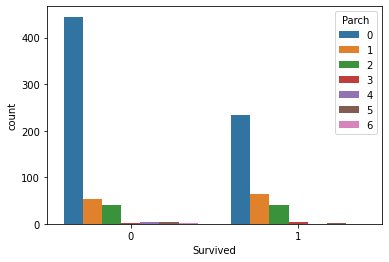

In [19]:
sns.countplot(x=training_data.Survived, hue=training_data.Parch)
training_data['Parch'].value_counts()

In [20]:
training_data.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

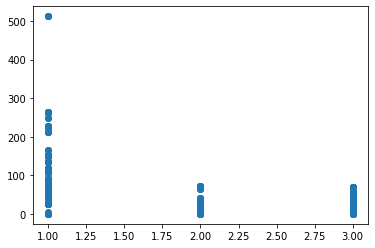

In [21]:
plt.scatter(training_data.Pclass,training_data.Fare)

low fare doesn't essentially mean low class; however, high fare indicates first class.
class 2 and 3 have very close fares

In [22]:
training_data.corr(method ='kendall')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.004090,-0.026824,0.027542,-0.048394,0.000798,-0.008921
Survived,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Pclass,-0.026824,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Age,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
SibSp,-0.048394,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
Parch,0.000798,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
Fare,-0.008921,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


According to correlation strength with survived;
Pclass,Fare,Parch,SibSp,Age

I don't see any significance to Name(unless I exclude title/feauture engineering), ticket

Now I will preprocess/clean my data

Missing values can be non-existent or missing. 
Age--> is useful in pattern finding so I will have to fill it.
Embarked--> contains only 2 null values; 
Cabin has the most missing values, most probably it I will not consider it.

In [23]:
training_data['Age'].fillna(training_data['Age'].median(), inplace=True)
missing_values_count = training_data['Age'].isnull().sum()
missing_values_count

0

fill in missing values of age with median

In [24]:
training_data['Embarked'].fillna(training_data['Embarked'].value_counts().idxmax(), inplace=True)
missing_values_count = training_data['Embarked'].isnull().sum()
missing_values_count

0

fill in missing values of age with mode

In [25]:
len(training_data['Cabin'].unique())

148

891-687=204 out of which 148 are unique
i will assume this feature doesn't contribute much to finding a pattern

In [26]:
training_data = training_data.drop(columns="Cabin")
missing_values_count = training_data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:12]

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No more missing values

In [27]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
print(training_data.Pclass,training_data.Fare)


0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


Name, ticket are irrelevant to survival-->should be dropped.
Next step is to label encode my categorical values sex and embarked
encoding these data columns transforms them to numbers which will facilitate the work of my model in finding a relationship between my features

In [29]:
le = LabelEncoder()
training_data['Sex']= le.fit_transform(training_data['Sex'])
training_data['Embarked']= le.fit_transform(training_data['Embarked'])
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


Scaling data is important for efficient model training.
I will colerate once more after processing data

In [30]:
# for min_max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data[['Age','Fare']] = scaler.fit_transform(training_data[['Age','Fare']])
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,0.139136,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,2
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,2


In [31]:
training_data.corr(method ='kendall')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.004090,-0.026824,0.035079,0.023575,-0.048394,0.000798,-0.008921,0.014201
Survived,-0.004090,1.000000,-0.323533,-0.543351,-0.031055,0.085915,0.133933,0.266229,-0.155747
Pclass,-0.026824,-0.323533,1.000000,0.129325,-0.254206,-0.039552,-0.021019,-0.573531,0.080867
Sex,0.035079,-0.543351,0.129325,1.000000,0.056784,-0.188694,-0.246536,-0.213480,0.112207
Age,0.023575,-0.031055,-0.254206,0.056784,1.000000,-0.115427,-0.174819,0.087221,-0.006112
SibSp,-0.048394,0.085915,-0.039552,-0.188694,-0.115427,1.000000,0.425241,0.358262,0.010231
Parch,0.000798,0.133933,-0.021019,-0.246536,-0.174819,0.425241,1.000000,0.330360,0.026272
Fare,-0.008921,0.266229,-0.573531,-0.213480,0.087221,0.358262,0.330360,1.000000,-0.051517
Embarked,0.014201,-0.155747,0.080867,0.112207,-0.006112,0.010231,0.026272,-0.051517,1.000000


Observations:
Survived: Sex,Pclass,Fare,Embarked,Parch,SibSp,Age. weakest is Age!
pclass*fare
sex*survived
parch*sbsp

Fare and pclass are strongly correlated if needed I can drop one of them, (fare as embarked>fare *survived)

In [32]:
y= training_data["Survived"]
features=["Pclass","Parch","SibSp","Age","Sex","Embarked","Fare"]
X=training_data[features]

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

I will create different models and train them,
basic means of evaluation--> calculate score based on X_train,y_train
                           -->calculate error using y_test

In [34]:
RandomForest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
RandomForest_model.fit(X_train,y_train)
score = RandomForest_model.score(X_train,y_train)
score

0.848314606741573

In [35]:
val_predictions = RandomForest_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.16759776536312848


In [36]:
DecisionTree_model = DecisionTreeClassifier(random_state=0)
DecisionTree_model.fit(X_train,y_train)
score = DecisionTree_model.score(X_train,y_train)
score

0.9817415730337079

In [37]:
val_predictions = DecisionTree_model.predict(X_test)
print(mean_absolute_error(y_test,val_predictions))

0.22346368715083798


Decision tree has highest score but highest error as well;overfitting. I can catgorize columns if needed. or grbee kda tsheelee features.
Random forest already solves this problem

In [38]:
LR_model = LogisticRegression(random_state=0)
LR_model.fit(X_train,y_train)
score = LR_model.score(X_train,y_train)
score

0.797752808988764

In [39]:
val_predictions = LR_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.2011173184357542


In [40]:
KNeighbors_model = KNeighborsClassifier(n_neighbors=3)
KNeighbors_model.fit(X_train,y_train)
score = KNeighbors_model.score(X_train,y_train)
score

0.8679775280898876

In [41]:
val_predictions = KNeighbors_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.1787709497206704


In [42]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)
score = NB_model.score(X_train,y_train)
score

0.7879213483146067

In [43]:
val_predictions = NB_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.2122905027932961


NB figures aren't good so I'll exclude it

In [44]:
estimator = []
estimator.append(('rf',RandomForest_model))
estimator.append(('knn', KNeighbors_model))
estimator.append(('lr',LR_model))
estimator.append(('DT',DecisionTree_model))
vot_hard_model = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard_model.fit(X_train,y_train)
score = vot_hard_model.score(X_train,y_train)
score

0.8595505617977528

In [45]:
val_predictions = vot_hard_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.17318435754189945


Before deploying my model on real testing data, I will preprocess testing_data accordingly for consistency

In [46]:
# for min_max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
testing_data[['Age','Fare']] = scaler.fit_transform(testing_data[['Age','Fare']])
testing_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,0.452723,0,0,330911,0.015282,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.617566,1,0,363272,0.013663,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,0.815377,0,0,240276,0.018909,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,0.353818,0,0,315154,0.016908,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.287881,1,1,3101298,0.023984,NaN,S


In [47]:
le = LabelEncoder()
testing_data['Sex']= le.fit_transform(testing_data['Sex'])
testing_data['Embarked']= le.fit_transform(testing_data['Embarked'])
testing_data.shape

(418, 11)

In [48]:
testing_data['Fare'].fillna(testing_data['Fare'].value_counts().idxmax(), inplace=True)
testing_data['Age'].fillna(training_data['Age'].median(), inplace=True)
test=testing_data[features]
test

,Pclass,Parch,SibSp,Age,Sex,Embarked,Fare
0,3,0,0,0.452723,1,1,0.015282
1,3,0,1,0.617566,0,2,0.013663
2,2,0,0,0.815377,1,1,0.018909
3,3,0,0,0.353818,1,2,0.016908
4,3,1,1,0.287881,0,2,0.023984
...,...,...,...,...,...,...,...
413,3,0,0,0.346569,1,2,0.015713
414,1,0,0,0.512066,0,0,0.212559
415,3,0,0,0.505473,1,2,0.014151
416,3,0,0,0.346569,1,2,0.015713


Random forest hyper paramters:
N-estimators-->number of decision trees default 100
Criterion-->function: gini or entropy default gini
Max_depth-->number of levels in decision trees default none
Max_features-->number of features at each split default auto
Bootstrap--> Bootstrap samples or whole data feault true
Min_samples_split--> samples per split default 2
Min_sample_leaf--> samples required to reach leaf node default 1

In [49]:
parameter_grid={'bootstrap':[True,False],
                'max_features': ['auto', 'log2'],
                'max_depth': [2, 4, 5, 10, 15, 25],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf' : [1, 2, 4],
                'n_estimators': [100, 300, 500, 800]}

In [50]:
RandomForest_model2 = RandomForestClassifier()

In [51]:
from sklearn.model_selection import RandomizedSearchCV
Randomized_search_model=RandomizedSearchCV(estimator = RandomForest_model2, 
                                           param_distributions = parameter_grid, 
                                           n_iter = 100, 
                                           cv = 7, 
                                           verbose=2, 
                                           random_state=42, 
                                           n_jobs = -1)

In [52]:
Randomized_search_model.fit(X_train,y_train)
Randomized_search_model.best_params_

Fitting 7 folds for each of 100 candidates, totalling 700 fits


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

momken a2l shwya 3shan el combinations kteera 

In [53]:
score = Randomized_search_model.score(X_train,y_train)
score

0.9143258426966292

In [54]:
score = Randomized_search_model.score(X_test,y_test)
score

0.8435754189944135

In [55]:
score = RandomForest_model.score(X_test,y_test)
score

0.8324022346368715

In [56]:
val_predictions =  Randomized_search_model.predict(X_test)
print(mean_absolute_error(y_test, val_predictions))

0.1564245810055866


In [57]:
predictions = Randomized_search_model.predict(test)
predictions.shape

(418,)

In [58]:
output = pd.DataFrame({'PassengerId': testing_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


References:
Kaggle courses
https://www.freecodecamp.org/news/feature-engineering-and-feature-selection-for-beginners/